In [1]:
from __future__ import division
from scipy.constants import physical_constants
# import BGW_utils as BGW_utils
import sys

import numpy as np

import subprocess
import h5py

import matplotlib.pyplot as plt
#%matplotlib inline
config_dir = '/Users/rdelgrande/work/presentation.mplstyle'
plt.style.use(config_dir)


sys.path.insert(0, '/Users/rdelgrande/work/Codes/utilities/BGW')


# Constants
# ref: https://docs.scipy.org/doc/scipy/reference/constants.html#
Ry2eV = physical_constants["Rydberg constant times hc in eV"][0]
bohr2A = physical_constants["Bohr radius"][0]*1e10
Ha2eV = Ry2eV*2


In [2]:
import func_GW_data

import importlib        
importlib.reload(func_GW_data)

<module 'func_GW_data' from '/Users/rdelgrande/work/Projects/MAPI/ANALYSIS/func_GW_data.py'>

# absorption data

In [3]:
eigvals_file = '/Users/rdelgrande/work/TEMP_DATA/MAPI_orthorhombic/frontera/Absorption/eigenvalues.dat'
data = np.loadtxt(eigvals_file)
eigvals = data[:, 0]
dipole_abs = data[:, 1]

absorption_data = np.loadtxt('/Users/rdelgrande/work/TEMP_DATA/MAPI_orthorhombic/frontera/Absorption/absorption_eh.dat')
dipole_abs = dipole_abs / np.max(dipole_abs) * np.max(absorption_data[:3000, 1])


(1.5, 5.0)

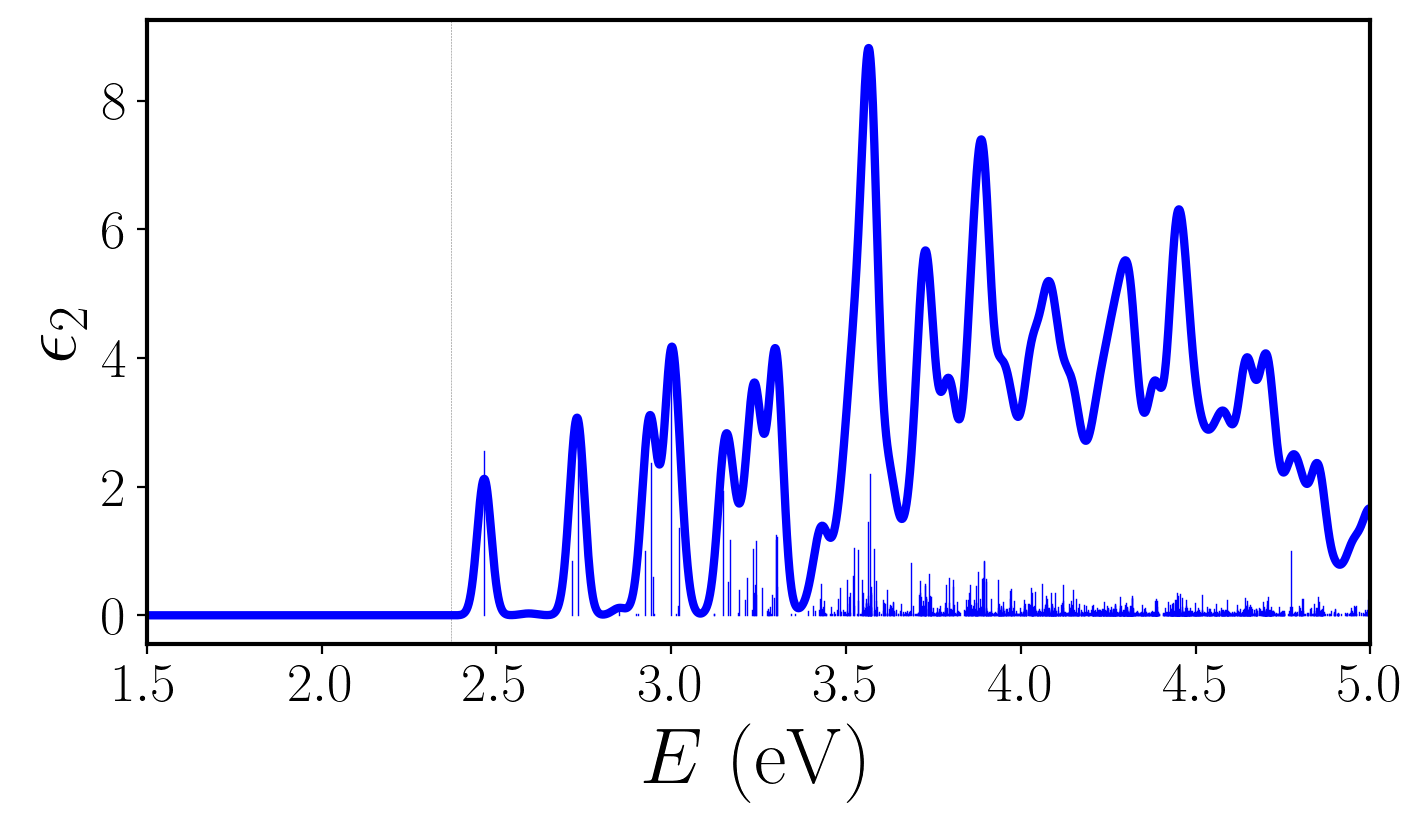

In [21]:
plt.figure(figsize=(7,4))

Gap_ortho = 4.304881 - 1.934796
plt.axvline(x=Gap_ortho, linewidth=0.2, linestyle='--', alpha=0.5)

plt.plot(absorption_data[:, 0], absorption_data[:, 1], color='b')

for i in range(len(eigvals)):
    plt.plot([eigvals[i], eigvals[i]], [0, dipole_abs[i]], color = 'b', linewidth = 0.5)

plt.xlabel(r'$E \ (\mathrm{eV})$')
plt.ylabel(r'$\epsilon_2$')

plt.xlim([1.5, 5])

# Analysing eigenvalues and how much it diverges from hydrogenic model

In [23]:
Gap_ortho = 4.304881 - 1.934796
print(Gap_ortho)

print((eigvals - Gap_ortho)[:10])
print(eigvals[:10])

2.370085
[-0.149845   0.09507    0.139304   0.1676028  0.202072   0.2031814
  0.215286   0.2365853  0.3031609  0.3115558]
[2.22024   2.465155  2.509389  2.5376878 2.572157  2.5732664 2.585371
 2.6066703 2.6732459 2.6816408]


# forces on ph displacement basis 

In [5]:
Forces_ph = []

data_dir = '/Users/rdelgrande/work/TEMP_DATA/MAPI_orthorhombic/frontera/excited_state_forces'

for i_force in range(50):
    data_file = data_dir + f'/forces_phonons_basis.out_{i_force+1}'
    data = np.loadtxt(data_file, usecols=(1, 2))
    Forces_ph.append(data)

    data_temp = np.loadtxt(data_file, usecols=(1))

    
Forces_ph = 4 * np.array(Forces_ph)

# multiply by 4 to compare with excited state forces on cubic MAPI

In [6]:
Forces_ph

array([[[-5.78435475e-11,  6.25260176e-06],
        [-3.21589406e-10, -4.38986085e-06],
        [-3.23140881e-10,  2.08517019e-05],
        ...,
        [-1.90567322e-08,  9.39641238e-06],
        [-2.61459975e-08,  2.40887869e-05],
        [ 8.72299599e-09, -5.99859865e-05]],

       [[-1.19607308e-10,  7.96556534e-06],
        [-5.59704650e-11,  2.32966059e-05],
        [ 3.44049906e-10,  7.05433009e-06],
        ...,
        [-8.84525837e-09, -7.79590669e-06],
        [-2.26766509e-08,  8.15599122e-05],
        [ 2.24104406e-08,  8.66555653e-06]],

       [[-9.14971526e-10,  5.20733496e-05],
        [-1.70003127e-08, -4.69258491e-05],
        [-1.58458787e-08,  1.96020361e-04],
        ...,
        [-5.03373473e-08,  4.19730872e-05],
        [ 2.05533787e-09,  6.91217652e-05],
        [ 4.00383662e-08, -2.72232158e-04]],

       ...,

       [[-3.64344414e-08, -7.55894889e-06],
        [ 7.74562734e-09, -1.28134756e-05],
        [-3.32052832e-08, -5.31039654e-06],
        ...,
     

In [7]:
# getting vibrational freqs

data_dir = '/Users/rdelgrande/work/TEMP_DATA/MAPI_orthorhombic/frontera/DFPT/'

def get_freqs(dynmat_out_file):

    freqs_ph = []

    arq = open(dynmat_out_file)
    for line in arq:
        line_split = line.split()
        if len(line_split) > 0:
            if line_split[0] == 'freq':
                freqs_ph.append(float(line_split[7]))
                # print(line_split, len(line_split))
                
    return np.array(freqs_ph)

dynmat_out_file = data_dir+"eigvecs"
freqs_ph = get_freqs(dynmat_out_file)

In [8]:
freqs_ph

YTICKS = []
for imode in range(144):
    # YTICKS.append(int(freqs_ph[imode]))
    f = freqs_ph[imode]
    YTICKS.append((round(f, 2)))

In [9]:
np.shape(Forces_ph)
excitons_to_show = 50 # must be < 999

# test
# relevant_forces_indexes = (1,2,3,4, 100)
# Forces_ph[0, relevant_forces_indexes, 0]


relevant_forces_indexes = []
Fmax = np.max(Forces_ph[:,:,0])

for i_ph in range(len(freqs_ph)):
    Fmax_for_i_ph = np.max(Forces_ph[:,i_ph,0])
    if Fmax_for_i_ph > Fmax/100:
        print(i_ph+1, Fmax_for_i_ph, freqs_ph[i_ph])
        relevant_forces_indexes.append(i_ph)
        
YTICKS_new = [YTICKS[i_ph] for i_ph in relevant_forces_indexes]

4 0.1499783955692312 7.243582
18 0.44524636180893007 32.985195
25 0.8200669788564774 41.170809
30 0.009043509834544312 60.253135
48 0.2646831889610594 101.287253
53 0.7728855807986112 106.46373
68 0.19238750472994484 169.046762
82 0.02305115874685639 897.318352
85 0.15024396883216526 1024.692279
96 0.06460206460945352 1234.637653
98 0.18973778076370112 1363.331735
103 0.10497181621226279 1401.924155
109 0.10363088811850744 1406.324674
118 0.10488325569601027 1532.910274
121 0.07274769071342808 2938.059418
126 0.09048552808914793 3032.535325
134 0.12795477963747806 3040.521546
138 0.1878787972677851 3076.400002


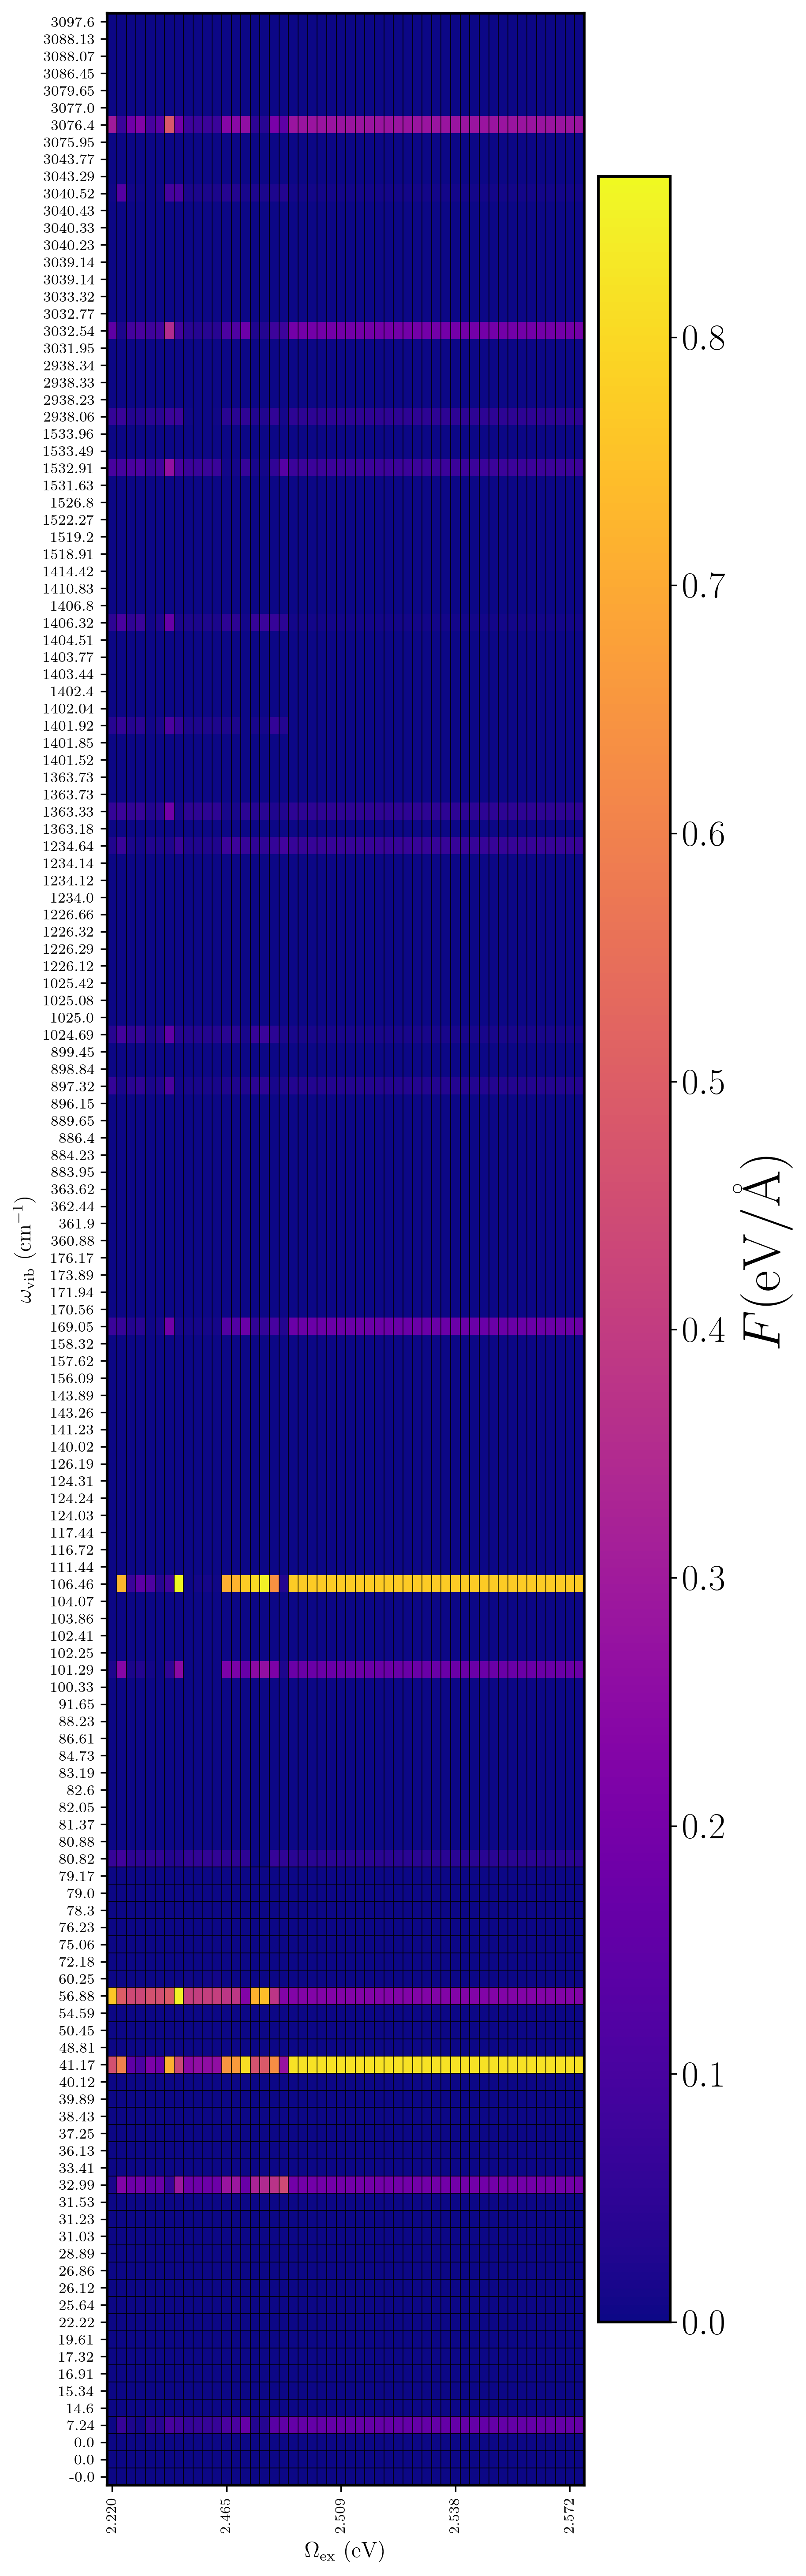

In [10]:
excitons_to_show = 50 # must be < 999
Vals_to_show = 4

plt.figure(dpi=300, figsize=(6, 32))

# plt.matshow(abs(Forces_ph[:100, :, 0]))
im = plt.imshow(abs(np.transpose(Forces_ph[:excitons_to_show, :, 0])), origin="lower", aspect=1.8, cmap='plasma')
cb = plt.colorbar(im, aspect=30, pad=0.03, label=r'$F(\mathrm{eV/\AA})$')




Omega_min = eigvals[0]
Omega_max = eigvals[excitons_to_show - 1]
Delta_Omega = (Omega_max - Omega_min) / Vals_to_show

XTICKS_VALS = [iO for iO in range(0, excitons_to_show, int(excitons_to_show/Vals_to_show))]
XTICKS = ["%.3f" % eigvals[i_omega] for i_omega in range(len(XTICKS_VALS))]

plt.yticks([imode for imode in range(len(YTICKS))], YTICKS, fontsize=8)
plt.xticks(XTICKS_VALS, XTICKS, rotation=90, fontsize=8)
# plt.xticks([])
# plt.yticks([])

for i_exc in range(excitons_to_show):
    plt.axvline(x = i_exc + 0.5, color='black', linewidth=0.4)
    
for i_freq in range(36):
    plt.axhline(y = i_freq + 0.5, color='black', linewidth=0.4)
    
plt.xlabel(r'$\Omega_{\mathrm{ex}} \ (\mathrm{eV})$', fontsize=12)
plt.ylabel(r'$\omega_{\mathrm{vib}} \ (\mathrm{cm^{-1}})$', fontsize=12)

print(' ');


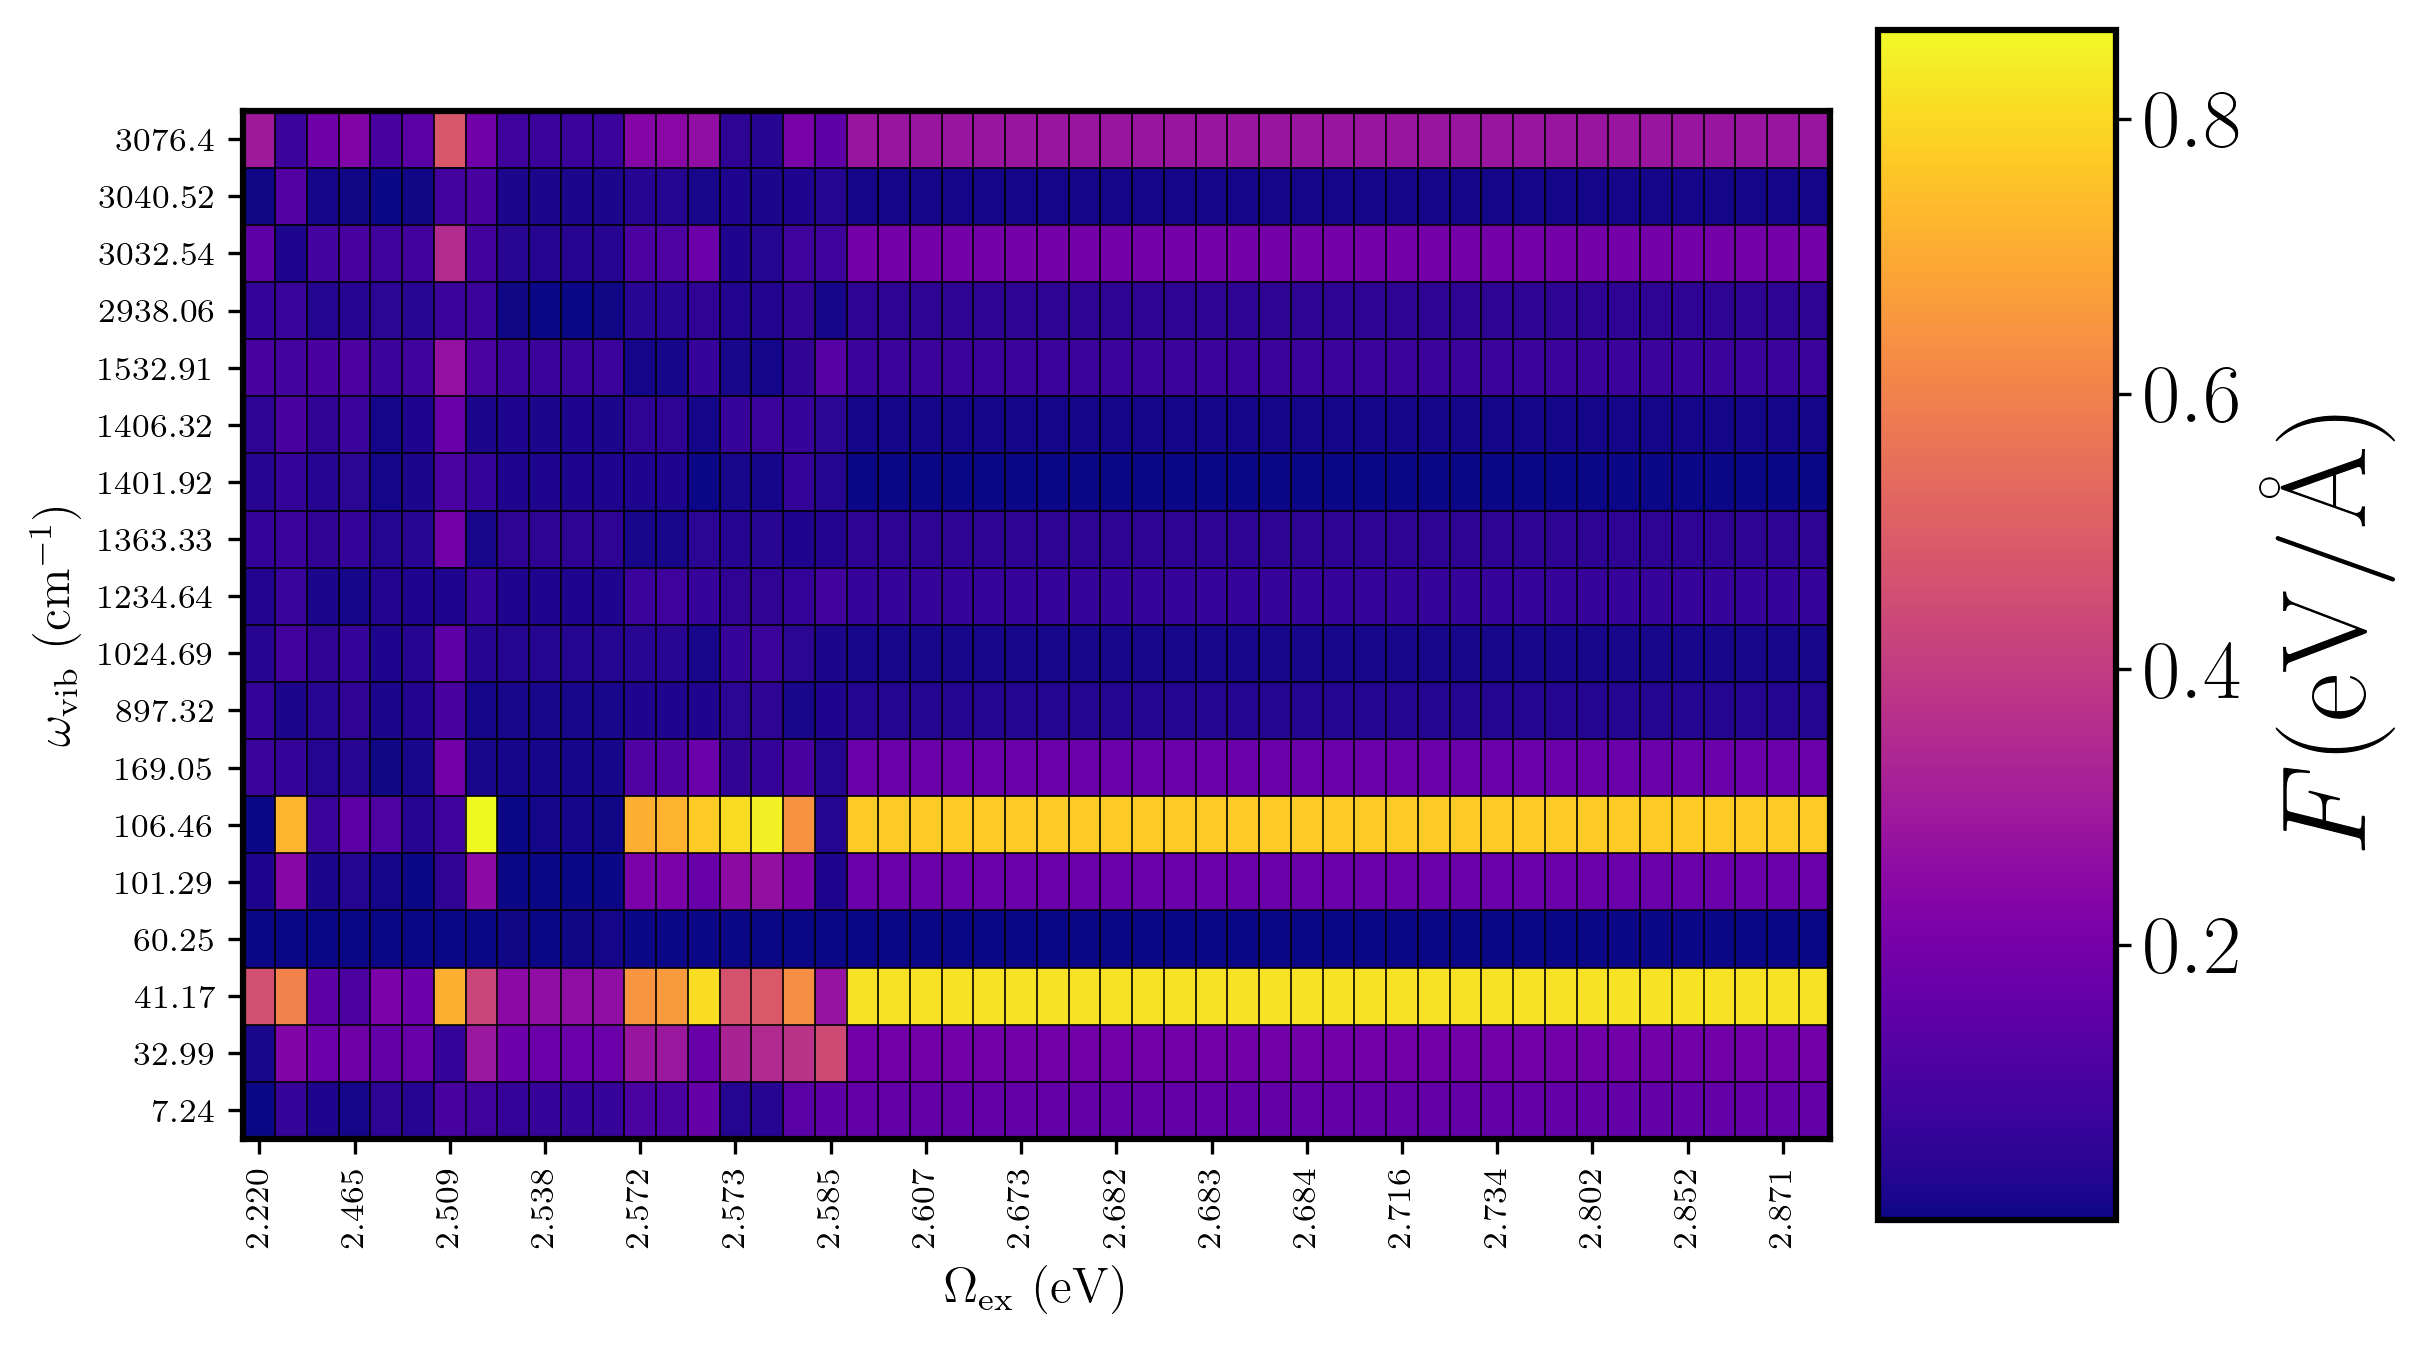

In [11]:
excitons_to_show = 50 # must be < 999
Vals_to_show = 15

plt.figure(dpi=300, figsize=(8, 12))

# plt.matshow(abs(Forces_ph[:100, :, 0]))
im = plt.imshow(abs(np.transpose(Forces_ph[:excitons_to_show, relevant_forces_indexes, 0])), origin="lower", aspect=1.8, cmap='plasma')
cb = plt.colorbar(im, aspect=5, pad=0.03, label=r'$F(\mathrm{eV/\AA})$')



plt.yticks([imode for imode in range(len(YTICKS_new))], YTICKS_new, fontsize=8)


Omega_min = eigvals[0]
Omega_max = eigvals[excitons_to_show - 1]
Delta_Omega = (Omega_max - Omega_min) / Vals_to_show

XTICKS_VALS = [iO for iO in range(0, excitons_to_show, int(excitons_to_show/Vals_to_show))]
XTICKS = ["%.3f" % eigvals[i_omega] for i_omega in range(len(XTICKS_VALS))]

plt.xticks(XTICKS_VALS, XTICKS, rotation=90, fontsize=8)
# plt.xticks([])
# plt.yticks([])

for i_exc in range(excitons_to_show):
    plt.axvline(x = i_exc + 0.5, color='black', linewidth=0.4)
    
for i_freq in range(len(YTICKS_new)):
    plt.axhline(y = i_freq + 0.5, color='black', linewidth=0.4)
    
    

    
plt.xlabel(r'$\Omega_{\mathrm{ex}} \ (\mathrm{eV})$', fontsize=12)
plt.ylabel(r'$\omega_{\mathrm{vib}} \ (\mathrm{cm^{-1}})$', fontsize=12)

print(' ');
